#Session 2: Logistic Regression

We studied about Linear Regression in the last session. Let us learn about another fundamental concept in Machine Learning: The Logistic Regression.

So let us first start by dissecting the terms and try to get an intuition of what logistic regression means.

### Logistic Regression: an Intuition

You may recognize the term "Regression". Do you recall what Regression means in Machine Learning?

Regression is prediction of a value, given some inputs. This value is calculated by feeding the input to a function. This function is adjusted in a way, that it gives us the best predictions over the data that we provide to it.

Then we studied about Linear Regression, which is a regression technique that uses a linear function as the model. We also studied about non-linear regression as an extension of linear regression. 



Let us now study about Logistic Regression. 

However, there's a small catch here. Logistic Regression is not really Regression, but a classification technique. What is classification?

Classification means to classify items into categories, or classes. For example, among a collection of pictures of dogs and cats, we would like our model to tell which one is which.

We'll be looking at a lot of classification techniques over this course. Logistic Regression will be the first of these. 

So let us first understand how logistic regression works, and then we'll surely answer the question - *Why is Logistic Regression called Regression, if its a classification technique?*

## Logistic Regression

If you were to break down what Linear Regression is - you would realize, it simply means - **Regression** using a **Linear** Model. By the same logic, Logistic Regression would relate to a Logistic Model (function).

What is a Logistic function?

#### Logistic Function
The logistic function or the sigmoid function is defined as below:

$sigmoid(x) = \frac{1}{1+e^{-x}}$

It looks something like this:
<div>
<img src="https://drive.google.com/uc?id=1_En_37XZ1MLhYrsX0kxQhLml7kisHW1V" width="500"/>
</div>

So, if this is a Logistic function, what would logistic regression mean? Naturally it would mean modeling the data using a logistic function. Ideally it would be helpful in a case where the data is distributed more or less over a sigmoid function.

But we don't usually see data distributed in this fashion - there are almost no practical scenarios where data is distributed in this fashion. Actually, this function is not used for prediction of a value at all. As we said, it is used for classification. But how can we use a function for classification?

Before we start explaining that, let us point out a unique property of this function. Notice how the function strictly lies between 0 and 1. It approaches 1 as the input approaches $+\infty$, and 0 as the input approaches $-\infty$. 




Before moving forward, let us make sure, we implement the function in python. Infact, we'll try to implement whatever concept we introduce. And we'll also tell you tricks, like when you don't need to implement a function, and can simply use a pre-implemented version of the code.

We begin by importing the library PyTorch. As you know, our data would be in the form of Tensors, so PyTorch gives us great tools to handle Tensors. PyTorch is also a great numerical processing library (meaning, it can efficiently handle complex calculation on a large set of numbers simultaneously).

In [1]:
import torch

In [2]:
def sigmoid(x): return 1/(1+torch.exp(-x))

torch.exp(x) is the same as $e^x$. 

Minor Technical Detail: It does not take any values for input (x). PyTorch expects all inputs to be Tensors, so `x` needs to be a Tensor

Now let's test it on some values.

In [3]:
sigmoid(torch.tensor((100.)))   #sigmoid(100) is so close to 1, that the computer rounds it off to 1 itself. 
                                #But theoretically, yes, it would be very close to 1, but not exactly 1. The round-off does not matter practically!

tensor(1.)

In [4]:
sigmoid(torch.tensor((-100.)))

tensor(0.)

In [5]:
sigmoid(torch.tensor(0.))

tensor(0.5000)

Moving ahead, as you would know, Computers can only understand numbers. (Even in the last session, you would remember, we had to convert dates into numbers, because computers do not understand dates). 

So it doesn't understand that our classes are 'dogs' or 'cats'. To make the computer understand which one is which - we assign a *label* to each of these classes. By convention, let us name them 0 (for dogs) and 1 (for cats). (You can interchange the labels - there's nothing wrong in that).

So now we come to the core idea of Logistic Regression - The sigmoid function will always produce an output between the values 0 and 1. If the output is closer to 1 than it is to 0 (ie, more than 0.5), we will say, that the model predicts the output to be 1, and if it is closer to 0 than it is to 1 (i.e., less than 0.5), then we would say that the model predicts the output to be 1. Does it make sense logically to you? 

Don't worry if the underlying idea is not yet clear. We would explore all the details in the following sections. 

So this is how Logistic Regression is used for Classification. 

Now coming to the question - *Then why is it called Regression anyways?*

The answer would be clearer as we look into the details. What you should know now, is that, we would ultimately create a Regression Model - a model that predicts a value, which lies between 0 and 1. And then we would create a condition, that would classify the prediction as 0 or 1, based on whether the value of the prediction is less or more than the threshold of 0.5. So we're trying to do classification through a regression model. Fascinating!

#### So how do we model a Logistic Regression Model?
 
By this, what we actually mean is - given some data points, which have multiple features (`x1`,`x2` and so on) and a target value (label , or categories , or classes), how do we form a logistic regression model?

Let us take a look at the logistic function again, because we know have an idea that in the end, our output is going to be the result of the logistic function. 

$sigmoid(a) = \frac{1}{1+e^{-a}}$


We only have one parameter in this equation - `a`, where `a` is a real number. But our model has multiple features (`x1`, `x2`, `x3` and so on). How do we model a logistic function in terms of all these multiple features, if we have only one variable as the input?

We already learnt of a technique to combine multiple variables into one single value - the *Linear Regression* Model. 

```
y = w1*x1 + w2*x2 + w3*x3 + ... + b
```
`y` is the variable that contains the characteristics of all input features. 

So, now you can guess how the logistic regression model will be formulated.

$model(x_1,x_2,x_3....) = sigmoid(w_1.x_1 + w_2.x_2 + w_3.x_3 + ..... + b) $

or in other words,

$model(x_1,x_2,x_3....) = \frac{1}{1+e^{w_1x_1 + w_2x_2 + w_3x_3 + ... + b}} $

Thats it! That is the logistic regression model. 


#### So how does it work?
What are the parameters of the model? Remember, that parameters are the variables that we change in order to make our model work. We do not have control over the exponential $e$, nor do we have control over the data (x1,x2...). We only have control over w1,w2....,b. These are our parameters.

We would like to adjust our parameters in a way, that for each data point (having features x1,x2...), the linear function `w1*x1 + w2*x2 + .... + b` predicts a value greater than 0 if the target class is a 1 (hence giving the output of the logistic function greater than 0.5, which means, we would say that the model predicts the model to be a 1).

And if the actual target class is 0, we would want the linear function to return a value less than 0, so that the sigmoid (logistic) function returns a value less than 0.5, and thus we would say, that the model predicts the class to be a 0.

Phew! That's a lot to take in at once. Go back and read this again, and make sure you understand the logic. If needed, go back and study the logistic function, the linear regression model, and how they work, and how they all come together to form a classification model. 

We would adjust the parameters w1,w2....,b using an algorithm we already learned about - the *Gradient Descent!*

# Case Study: Identifying Handwritten Digits

Given an image of a handwritten digit, can we build a classifier that can identify what digit it is? Digits refers to integers from 0 to 9, both inclusive.

<div>
<img src="https://drive.google.com/uc?id=1SLXc1HNY9uiO3jGVJ8sTYm0WE-ZpcJNc" width="500"/>
</div>

In the image above, notice, all the different styles in which any digit can be written. The model needs to "learn" the characteristics of digits. What differentiates a 1 from a 2, or a 5 from a 9? To be fair, it is difficult for even humans to express the idea of distinction in words. But we still Can give a vague answer to this question - each number has its own way of writing - for example, a 1 is not likely to have a curved line, but a 2 is likely to have a curve. Its quite amazing that a model can learn these ideas - and remember, all this is learnt in the form of parameters, which are nothing but numbers in themselves!

This dataset is called the MNIST dataset, which contains 28x28 pixel greyscale images for all digits. We however will look at only 2 digits (remember, logistic regression is meant for binary classification). (We will however, look at how to classify among multiple classes too, later on!)

So let us donwload this dataset. Last time, we used the Kaggle API to download the dataset. We can use it this time too! But let us look at another alternative! Its good to know of all possible options to carry out a task - good practitioners should know of their options, because each option, more often than not, has it's pros and cons, and every method is not the best choice for a given task. But still, if you wish to use the Kaggle API, [here](https://www.kaggle.com/c/digit-recognizer/data) is the link to the dataset. Follow the exact procedure as last session. Below is a commented out peice of code from last session to download the dataset. Remember, you need to upload the kaggle.json file, and then enter the Kaggle API command.

In this session, we'll use the API provided by PyTorch. PyTorch provides us tools related to Computer Vision in a separate child library, called `torchvision`, which also includes some famous public datasets, MNIST being one of them. [Here](https://pytorch.org/docs/stable/torchvision/datasets.html) is the documentation for the datasets.

In [6]:
import torchvision

In [7]:
mnist_train_ds = torchvision.datasets.MNIST(root='',download=True)
mnist_test_ds  = torchvision.datasets.MNIST(root='',train = False, download=True)
len(mnist_train_ds), len(mnist_test_ds)

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


(60000, 10000)

We have 2 variables - `mnist_train_ds` and `mnist_test_ds`. These refer to the Training set and the Test set, which is basically the result of splitting the entire datasets into two subsets. What do they mean?



### Splitting Datasets into training and testing sets

Imagine you have 1000 datapoints to train your model on. You successfully train your model. But now, the question is - *How do you know that your model actually works well?* 

You would say - the model predicts $p\%$ of the images in the dataset correctly, which is a good accuracy. 

But here's the problem - its very much possible, that the model might work well on data you've trained it on (The training dataset), but terrible on data that it hasn't. This is called *Improper Fitting of the model over the data*.  It basically means, that your model has not "learnt" the right things. 

This means that the parameters are set in a manner, that do not represent the general idea of the category, but only the specific characteristics of the images in the training dataset. Naturally, the model performs worse on images it never trained on, because it would come across new settings, that it hasn't learnt to identify. 

For example, if your model predicts which image is that of a cat or a dog - you would expect your model to learn the general characterisitics of dogs and cats, and not features such as - a picture of a dog is likely to have a green background (grass), while a cat is not (because dogs like to go out of the house, cats don't!). What if all your training images have dogs with a green background, and all cat images with an indoor background? Your model is likely to learn that too! 

Now, suppose you have a pet dog at home, and click a picture, and feed it to your model. This picture has an indoor setting, so the model is likely to predict it as a cat. That is how improper fitting works.

---

### So how do we make sure that the model fits well through the data?

Keep aside a small portion (say, 20%) of the dataset aside. Only train your model on the remaining data. And at the end, see how the model performs on the data that we kept aside (the data that the model has never seen). This would be an indicator of how well the model has learnt the general features of the data. Because if the model works well on data that it never came across, it *has* to be because the model has learnt the right characterisitics.

This dataset, that we keep aside is called the **Validation Set**, or the **Test Dataset**. These two essentially mean the same thing - a sub-dataset that is used to validate or test the correctness of the model. The model never trains on this dataset, and is used only to test the accuracy of the model. 

If the model does not perform well on the validation dataset, we make changes in the model and training mechanism. More specifically, we change the *hyperparameters* of the model, which are values other than the parameters (w1,w2....), which cannot be learned by the model, but need to be manually set by us. Learning Rate in the Gradient Descent Algorithm is one such example. So you may adjust the learning rate until the validation set accuracy is good enough for our application.

---

Note: 
1. In many courses, validation set and test set are two different concepts. A validation set refers to a set which is specifically used to set hyperparameters. In doing this, there is a chance we have "memorized" the validation set too, because we manually set the hyperparameters (eg, the learning rate) as a value that works well only for the particular (validation) set. So, we use a test set, which is  a set that we never use for either training or adjustment. It is *completely* unknown to the model. This is a stricter version of the idea we are trying to pursue (to keep aside a dataset that is not to be seen by the model during training). 

 However, for small scale projects, you need not necessarily separate the validation and the test datasets. They can be combined into one dataset, and can be called either the validation set, or the test set. In these sessions, we will interchangeably use the terms validation set and the test set, unless we explicitly mention otherwise. 


2. Improper fitting of the dataset can be of two types - Underfitting and Overfitting. You will learn more of this during the lectures. But if you are curious to know more about these concepts - [here](https://www.youtube.com/watch?v=edxhGBnT-Ps) is great intuitive explanation of the difference between the two!

3. 
 Why did we not use a validation set in the Linear Regression problem? In many courses, you will find a separate validation set being used for the Linear Regression Problem. This is technically right, but practically, we don't need a validation set for Linear Regression problems. This is because you cannot underfit or overfit linear data. The only extra data you may need in a linear regression model, is to carry out inference (checking the performance of the final model) (testing of the model).  

Let us look at how this dataset looks like. According to the documentation, you can index these dataset variables to get a tuple with the image, and the label

In [8]:
mnist_train_ds[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F9FCD849160>, 5)

In [9]:
mnist_train_ds[0][0]

#### Case Study: Binary Classification in the MNIST dataset

The MNIST dataset contains 10 labels (0 through 9), but if you remember, logisitic regression is meant to do binary classification. So let us take out two labels, say - 3's and 5's and try to differentiate between them.

In [10]:
threes_ds = [i for i in mnist_train_ds if i[1]==3]
fives_ds  = [i for i in mnist_train_ds if i[1]==5]
len(threes_ds), len(fives_ds)

(6131, 5421)

In [11]:
##Similarly, let us extract the test dataset also
threes_test_ds = [i for i in mnist_test_ds if i[1]==3]
fives_test_ds  = [i for i in mnist_test_ds if i[1]==5]
len(threes_test_ds), len(fives_test_ds)

(1010, 892)

And finally, we convert these to PyTorch tensors, and we'll build our model therefrom. The images in our dataset are objects of an Image Processing Library in Python, called PIL. So, to convert them to tensors, we use the `transforms` method of the torchvision library. 

In [12]:
def convert_PIL_to_tensors(images):
    images=list(images) #to make sure we can index the collection of images properly. Because of this, the input to this function need
                        #not necessarily be a list, but can a set, tuple, generator or even a dictionary
    return torch.stack(list(map(torchvision.transforms.ToTensor(),images))).float()

In [13]:
x_threes=convert_PIL_to_tensors([i[0] for i in threes_ds]).view(-1,28*28)
x_fives =convert_PIL_to_tensors([i[0] for i in fives_ds]).view(-1,28*28)

x_dataset = torch.cat((x_threes,x_fives))
y_dataset = torch.stack([torch.tensor(1.)]*len(x_threes) + [torch.tensor(0.)]*len(x_fives))

x_dataset.shape, y_dataset.shape

(torch.Size([11552, 784]), torch.Size([11552]))

Similarly for the test dataset

In [14]:
x_threes_test=convert_PIL_to_tensors([i[0] for i in threes_test_ds]).view(-1,28*28)
x_fives_test =convert_PIL_to_tensors([i[0] for i in fives_test_ds]).view(-1,28*28)

x_test_dataset = torch.cat((x_threes_test,x_fives_test))
y_test_dataset = torch.stack([torch.tensor(1.)]*len(x_threes_test) + [torch.tensor(0.)]*len(x_fives_test))

x_test_dataset.shape, y_test_dataset.shape

(torch.Size([1902, 784]), torch.Size([1902]))

A few details.

1. `convert_PIL_to_tensors` takes in a list of images, and returns a tensor containing numerical values (pixel values) of tensors. By the way, the pixel values of the MNIST dataset lie between 0 and 9. 0 is a completely black pixel, and 9 represents a white pixel. This scale is called the grayscale. Black and White Images are basically grayscale images. But torch.transform converts all values between 0 and 1. 

2. `.view()` is a pytorch tensor method used to reshape tensors. So we're essentially converting a tensor of shape (28,28) (The height and width of the image in pixels) to a single flattened tensor of length 28*28 = 784. What about the `-1` as the first argument? It means, "whatever value is needed to account for all the values". So if there are 100 images of shape (28,28), meaning there are 100x28x28 values in total, the `-1` would internally be replaced by `100`, in order to be account for all values. You can even add as many "dimensions" to the tensor as possible, as long as the total number of values in the tensors remains the same. 

3. What are dimensions of a tensor? A tensor is a multidimensional array. So think of a tensor with 2 dimensions as an "array of arrays", and with 3 dimensions as "an array of arrays of arrays", etc. `shape` is nothing but the values of all dimensions. So if a tensor is of shape (100,784), it means that it is an array containing 100 arrays, each of which contains 784 values. 

4. By convention, in Machine Learning, the first dimension represents the number of items, and the following values represent the shape of the data items. For example, a tensor of shape (100, 784) is a collection of 100 items, each having 784 features. 

 A tensor of shape (100, 3, 50, 50) is a collection of 100 items, each of which has the dimensions (3,50,50) (this is usually the case with images, which have 3 channels (RGB), and 50x50 is the height x width of the image). For grayscale images in the MNIST dataset, the tensor would be of the shape ($x$, 1, 28, 28), meaning a collection of $x$ items, each having an image shape of (1,28,28), meaning 1 single channel of shape 28x28 pixels. Don't worry if it doesn't make a lot of sense right now. You would get a hold of it through practice. 

5. For the sake of convenience, we convert all data tensors of shape (1,28,28), to a single array of 784 items. So now, these 784 items act as the features of the data. So correspondingly, our parameters, would be `w1, w2, w3, ....., w784, b`.

6. Note: We have assigned a label of 0 to our 3's and 1 to our 5's.

Let us see how the dataset is formatted. If you pick any image tensor (a tensor of length 784), and reshape it into the original size 28x28, you would get the original image back. To plot the pixels, we use the `matplotlib` library. 

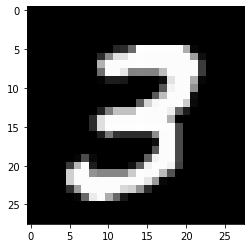

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_dataset[0].view(28,28), cmap='gray')

We also combine both the `x` and the `y` into one single variable, and simply call it the `dataset`. This dataset can be indexed to get both the x and y together, without having to handle two variable (x and y).

In [16]:
train_dset=list(zip(x_dataset,y_dataset))
valid_dset=list(zip(x_test_dataset,y_test_dataset))

In [17]:
x,y=train_dset[0]
x.shape,y

(torch.Size([784]), tensor(1.))

So now, we need 784 weights and 1 bias to create our model. Let us create a function to initiate parameters.

In [18]:
def init_params(size, requires_grad=True): return (torch.randn(size)).requires_grad_()

In [19]:
weights=init_params((28*28,1))
bias=init_params(1)

Let us now create our model

In [20]:
def logistic_regression_model(x): 
    return torch.sigmoid(x@weights + bias)

Lessons in Python!

**The `@` operator**

As we know, Python is THE most famous language for data sciences. Matrix multiplications are such an integral part of data sciences, that in 2014, python introduced an operator that is dedicated only for matrix multiplication. Remember, if you want to matrix multiply two matrices (A and B) of shapes (m x n) and (p x q) respectively, p should be equal to n, and the resultant matrix would be of the shape (m x q). If you are unclear about the concept of matrices and matrix multiplication, [here](http://matrixmultiplication.xyz/) is a great source to help you visualize. 

Lets test this model out!

In [21]:
preds = logistic_regression_model(x_dataset)
preds.shape

torch.Size([11552, 1])

#### The LOSS FUNCTION

So far we've looked at the Mean Square Error Loss Function. It represents the idea, that the larger the distance between two values, the larger the loss. This worked well for the regression case, where we wanted the predictions of the model to be as close as the target values. But that is not applicable for the classification case. We cannot define the difference between two classes, like the dog and class. What we need is a right/wrong approach. Is the prediction right? or is it wrong?

Let us analyse what we would want our model to do.

We would want our model to predict the value for 3's to be as close to 1., and predict 7's to be as close to 0. Because as we mentioned, if the prediction is closer to a 1 than to a 0, we would classify the result to be a 1. And if the prediction is closer to a 0 than to a 1, we would classify the result to be a 0.If you cannot wrap your hand around this concept, please go back a step and read the concepts again. Because if you understand the concepts well, you can implement the concepts easily too.

In [22]:
def binary_classification_loss(preds,targets):
    assert len(preds)==len(targets)
    return torch.where(targets==1,1-preds,preds).mean()

torch.where(targets==1,1-preds,preds) is the same as `[1-preds if i==1 else preds for i in targets ]`. However, it is a much more efficient method to handle tensors, both in terms of speed and memory.

It basically means, for each data point whose target is 1, the loss is 1-prediction. So if the model prediction is more closer to 0 than to 1 in this case, a higher penalty is assigned. And wherever the target is not 1 (ie , it is 0), the loss is preds. So if the prediction is closer to 1 than 0 in this case, a higher penalty is assigned. 

Finally, we take the mean of all these losses to give the average loss. Let's test if this loss function works!

In [23]:
binary_classification_loss(preds,y_dataset)

tensor(0.5212, grad_fn=<MeanBackward0>)

Note: In a lot of course, you would have seen the binary loss function written something as:

$Loss(pred, target) = mean([-y_i log(pred_i) – (1 – y_i) log(1-pred_i)])$

If you are familiar with this loss function, and are confused with why we have not used this form of expression - the answer is - we have implemented a similar idea. This loss function too penalizes the model based on similar principles. But we haven't used the `log` in our loss function. Actually, the `log` arises during the mathematics behind theory of prediction. When you study the concept of *Maximum Likelihood*, you will learn the exact details. But theory aside, in practice, the loss function we have implemented is correct too! In Practice, Loss function should be thought of as a function that penalizes wrong predictions, and rewards correct predicitions. And it should have some nice mathematical qualites wherever required, such as smoothness and continuity (so that it can be properly differentiated during Gradient Descent, for example).

Our task is to minimize this loss function. We do this through the Gradient Descent Algorithm. But before that, we will learn of an important variant of Gradient Descent - *The Batch Gradient Descent*.

#### Batch Gradient Descent

If you go back to the last lab session (Linear Regression), you would notice, that we passed the entire set of data into the model at once. This worked alright for our case, becaues the number of data points was not very huge. We were dealing with less than 2000 points. But in many cases, the number of datapoints is of the order of tens of thousands to anywhere close to millions of datapoints, and computers cannot handle so many datapoints at once. It leads to a lot of problems - sums tend to approach very large values which computers cannot process. It is also slow and thus, the model rarely works. This problem increases multifold when the number of features increases. 

The solution? We divide the data into smaller chunks, called *Batches*. And we only train the model on one batch at a time. The number of items in a batch, is called the *batch size*. You would usually see batch_sizes as powers of 2 - 2,4,8,16,32,64,128 and so on. The larger each datapoint is in size, the smaller batch size is recommended. Eg - pictures have a lot of features (pixels), and thus, a smaller batch size, like 8 or 16 is recommended. 

In PyTorch, this is done using the `DataLoader`, which is nothing but a class, that can divide the data into batches, and has some other useful properties, which you will learn as you use it more and more. PyTorch Dataloaders are found in the module `torch.utils.data`

In [24]:
from torch.utils.data import DataLoader

In [25]:
dl=DataLoader(train_dset,batch_size=16)
valid_dl=DataLoader(valid_dset,batch_size=32)

A dataloader acts as an iterator (meaning something over which you can iterate. List too is an iterator. Remember how we do `for i in list`. We are basically iterating through it).

So, when we do `for x_batch,y_batch in dl`, we will get batches of x and y together. Each batch is a tensor of shape `(batch_size, size_of_datapoint)`. Eg.

In [26]:
x_batch,y_batch=next(iter(dl))
x_batch.shape, y_batch.shape

(torch.Size([16, 784]), torch.Size([16]))

Next, we define the structure of our Gradient Descent Algorithm. This is the same code we developed for the last session, with only minor changes.

In [27]:
def calc_grad(x_batch,y_batch,model): 
    preds=model(x_batch)
    loss=binary_classification_loss(preds,y_batch)
    loss.backward()

def train_epoch(model,lr,params):
    for x_batch,y_batch in dl: 
        calc_grad(x_batch,y_batch,model)
        for p in params:
            p.data -= lr*p.grad 
            p.grad.zero_()

def batch_accuracy(preds,y_batch):
    return ((preds>=0.5)==y_batch).float().mean()

def validate_epoch(model):
    accs=[batch_accuracy(model(x_batch),y_batch) for x_batch,y_batch in valid_dl]
    return torch.stack(accs).mean().item()

In [28]:
#reinitializing the parameters. Do this everytime you want to rerun the model
weights=init_params((28*28,1))
bias=init_params(1)
params=weights,bias

In [29]:
for _ in range(50): #run this model for 50 iterations
    train_epoch(logistic_regression_model,0.2,params)
    print(validate_epoch(logistic_regression_model),end=' ')

0.484375 0.5245442986488342 0.5688151121139526 0.6152994632720947 0.671679675579071 0.7065755128860474 0.738476574420929 0.7602027654647827 0.7773903012275696 0.7873512506484985 0.7967913150787354 0.8061663508415222 0.8129371404647827 0.8191871643066406 0.8280413150787354 0.8290830254554749 0.8332496881484985 0.839043915271759 0.8447731137275696 0.8473772406578064 0.8505674004554749 0.853692352771759 0.8599423766136169 0.8630673885345459 0.8667783141136169 0.8709449768066406 0.8725074529647827 0.8745908141136169 0.876153290271759 0.8797991275787354 0.8813616633415222 0.8850075006484985 0.8881324529647827 0.8912574648857117 0.8943824768066406 0.8954241275787354 0.8960101008415222 0.8965309262275696 0.8975725769996643 0.8991350531578064 0.8996559381484985 0.901739239692688 0.9022600650787354 0.9043434262275696 0.9053850769996643 0.9059059023857117 0.906426727771759 0.9074684381484985 0.9074684381484985 0.9090309143066406 

#### The model is about 88% accurate. That means, about 88% of the times, the model is able to tell which image is a three and which is a five. That is incredible!

Note: the number of iterations in Gradient Descent are also called as **Epochs**. So for the above case, we train this model for 50 epochs.

Task: (Non-Evaluative) - Try adjusting the learning rate and epochs by hit and trial and try to get as much accuracy as possible. Atleast try getting an accuracy of more than 90%.

So there you have it! You have trained your first classification model! Congratulations!

# Review:
Below we've given some review questions for you to try out. But before that, there are a few tips and review points, that you should go through, think over, and make sure you understand each of them. These points are the most important points of this entire session - and not surprisingly, these are the concepts and ideas that will actually help you be a good Machine Learning practitioner.

### Some Tips:
* **Stay up-to-date with the tools of Machine Learning**: As we've mentioned earlier, Machine Learning is an extremely fast moving domain. Every few weeks, new ideas and tools emerge, and within the next few weeks, these will become obsolete too. There are very few concepts and tools that last very long. That shouldn't discourage you. But encourage you to learn the skill of *unlearning* and *learning* fast. For example, a lot of you may have heard of the library NumPy, which is a numerical processing library. A * lot * of practitioners use this library to carry out the calculations (that we have done in this session, such as calculation of the sigmoid function, or matrix multiplications, etc). But notice how we carried out all numerical processing using PyTorch itself. Its not true that we could not have done the processing using NumPy, but it just wasnt the right choice. PyTorch offers the majority of processing tools offered by numpy, with the only difference - it is optimized for Tensors. It clearly was better suitable in this case. However, in another problem, numpy would be a better choice. Its also not true that PyTorch's numerical processing is superior than NumPy, its simply a case of suitability to the environment. We will use NumPy at some point too in these labs. 

 This intuition comes through practice. The important takeaway is, be open to new ideas and learn to adapt fast.

* **Proper Structuring of Code**: If you notice the code that we wrote above, you would notice, that we define a lot of function on the way. We didn't have to, we could have simply written the functionality directly, and calculated results. But it is not a good practice to do so. Code Refactoring(Structuring) is important to allow flexibility. Many times, your code simply wont work with some minor changes, if you dont structure your code properly. You also have to write the same piece of code again and again. 

  With proper structuring, you can make sure, you can tweak the functionality of the code with very minimal effort. This is especially important for highly complex codes, which have layers upon layers of code. If the code isn't properly structured, finding even simple bugs will turn into a nightmare. 

* As you develop codes, it is important to test whether the peice of code is working correctly. You would have noticed - at each step, we find out the shape of output tensors, and what all does a function return. 

### Review Questions:
These are non-evaluative, but highly recommended to go through. Make sure you clearly know the answer to each of these concepts. The answers to all these questions are somewhere in this notebook, so if you find yourself unclear with a concept, go back up and find the answer!

1. We imported many important libraries in this notebook. Whenever a library was imported, the reason and the goal was mentioned. Can you enlist all the libraries used in this notebook, and why they were used?

2. What is a dataloader? What purpose does it serve? What is a batch of data?

3. We have structured the data at many levels - from lists of our `x`'s and `y`'s, all the way to a dataloader. Can you draw a tree explaining the heirarchy of the data? At the top would be the dataloader, and the bottom would be the lists of inputs and targets.

4. What is the sigmoid function? Can you relate the sigmoid function to the concept of probability?

5. Write the formulas in Pseudo Math and in pseudo Code, of both the Mean Square Error Loss, and the logistic Regression Loss.

6. What is the difference between hyperparameters and parameters?

7. Explain the difference between the training set, the validation set and the test set.

# Exercise (Evaluative):

## 1. Who survived the Titanic?
[This problem](https://www.kaggle.com/c/titanic/overview) is one of the most famous problems on Kaggle. It has (real) information of all passengers on the Titanic, such as the age, sex, ticket class, fare price (which may be indicators of their social status), etc. Can you build a logistic regression model to identify who survived the Titanic, and who did not? 

The dataset is available from Kaggle itself, so we need to download the data using the API. Run the code below to upload the kaggle.json file, and download the data. 

Consider the following features: (See the details on the Kaggle page)
* `Sex` (in terms of 0's and 1's)
* `Age`
* `SibSp`
* `Parch`	
* `Fare`

Target Class: `Survived`

You need to *Normalize* the continuous variables (Fare and Age). See the bottom notes to see what Normalization is! 

You also need to use the pandas library to read csv files. Then you need to convert the data into tensors of suitable dimensions. Many values are not available in the dataframe, so for the sake of simplicity, we simply replace all inavailable values with 0's.

Finally, we need to manually split the training set into a training dataset and the validation subset, because the test set provided does not have labels. So there is no way to evaluate the performance of the model through this dataset. We will do a 80-20 split. We've written a basic structure for you. Continue from that point, building your model step by step.

In [30]:
%cd 
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json 

!kaggle competitions download -c titanic
!mkdir titanic
!mv train.csv titanic
%cd titanic

/root


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.82MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 52.2MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 24.6MB/s]
/root/titanic


In [31]:
!ls

train.csv


In [32]:
import pandas as pd
train_df =pd.read_csv('train.csv')
test_df = train_df.iloc[int(len(train_df)*0.8):]
train_df = train_df.iloc[:int(len(train_df)*0.8)]

In [33]:
print(len(train_df),len(test_df))
train_df.head()

712 179


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First we use the define the training data.

Steps you need to follow:
1. convert the 'Sex' attribute as a binary (0/1) feature.
2. Clean the data. Replace any non-defined values with a 0, using `df=df.fillna(0)`
3. normalize the required features. This can be done by `x=(x-x.mean)/x.std()`
4. Extract the required features from the dataframe to the tensor. The tensors would be of the shape (x,5) (because of 5 features). You are expected to write this functionality on your own. If however you feel totally stuck, and cannot come up with anything, we provide you with a function structure. It is not totally intuitive, so you still would need to figure out how to work with this function structure. 
```
def get_xtensors_from_dataframe(df,features:list,target: String,normalize:list=[]): 
    x=None
    for feature in features: 
        feature_list = list(df[feature])
        if feature in normalize: feature_list = normalize_feature(feature_list)
        if x is None: 
            x= [torch.tensor(feature_list)]
            continue
        x.append(torch.tensor(feature_list))
    return torch.stack(x).permute(1,0)
```


5. Once you have your tensors, build your dataset, then train your model using gradient descent.

In [34]:
train_df['Sex'] = [1 if i is True else 0 for i in (train_df['Sex']=='male')]
test_df['Sex']  = [1 if i is True else 0 for i in (test_df['Sex']=='male')]

In [35]:
train_df = train_df.fillna(0);
test_df =test_df.fillna(0);

In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


In [37]:
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target='Survived'
normalize=['Age','Fare']

In [44]:
def normalize_list(x): 
    x=torch.tensor(x)
    return (x-x.mean())/x.std()

def get_xtensors_from_dataframe(df,features:list,target: str,normalize:list=[]): #parameter:type = default_value is a comment for the user, that tells that the parameter is expected to be of the type "type", which has the default value "default_value"
    x=None
    for feature in features: 
        feature_list = list(df[feature])
        if feature in normalize: feature_list = normalize_list(feature_list)
        if x is None: 
            x= [torch.tensor(feature_list)]
            continue
        x.append(torch.tensor(feature_list))
        y=torch.tensor(df[target].values)
    return torch.stack(x).permute(1,0),y


In [45]:
x_train,y_train= get_xtensors_from_dataframe(train_df,features,target,normalize);
x_test,y_test= get_xtensors_from_dataframe(test_df,features, target,normalize)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


In [46]:
train_dset=list(zip(x_train,y_train))
valid_dset=list(zip(x_test,y_test))

train_dl=DataLoader(train_dset,batch_size=16)
valid_dl=DataLoader(valid_dset,batch_size=32)

In [47]:
def calc_grad(x_batch,y_batch,model): 
    preds=model(x_batch)
    loss=binary_classification_loss(preds,y_batch)
    loss.backward()

def train_epoch(model,lr,params):
    for x_batch,y_batch in train_dl: 
        calc_grad(x_batch,y_batch,model)
        for p in params:
            p.data -= lr*p.grad 
            p.grad.zero_()

def batch_accuracy(preds,y_batch):
    return ((preds>=0.5)==y_batch).float().mean()

def validate_epoch(model):
    accs=[batch_accuracy(model(x_batch),y_batch) for x_batch,y_batch in valid_dl]
    return torch.stack(accs).mean().item()

In [48]:
weights=init_params((5,1))
bias=init_params(1)
params=weights,bias; params

(tensor([[ 0.2711],
         [ 0.9581],
         [ 0.1385],
         [-0.5547],
         [-1.3455]], requires_grad=True), tensor([0.2927], requires_grad=True))

In [49]:
for _ in range(50): #run this model for 50 iterations
    train_epoch(logistic_regression_model,0.1,params)
    print(validate_epoch(logistic_regression_model),end=' ')

0.46950653195381165 0.4893164336681366 0.5266810059547424 0.562720000743866 0.5880872011184692 0.6166626811027527 0.6277304291725159 0.6368215680122375 0.6384491324424744 0.6423553824424744 0.6423553824424744 0.6436575055122375 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 0.6452850699424744 

### Normalization

Many times, we come accross, data that are of different scales. For example, if you have two features - age and annual salary, age is of the order of $O(10^2)$, while annual salary may be of the order $O(10^5)$. This creates a problem when we build the model, especially during training. The gradients of each parameter is affected by the values of all features, and so it is desirable that all these features have equal and reasonable contribution.

We've already seen an example of normalization in the last session. We divided some values by a number, to make all features comparable. Normalization especially needs to be done for values of very large magnitude, because they often lead to *gradient explosion* (the gradient tends to become infinite (Nan)).

A standard method to normalize values of a feature is to normalize them to a mean of 0 and standard deviation of 1. The way this is carried out is:

$x \sim N(0,1) = \frac{x-mean(x)}{std(x)}$

In general you can adjust the mean and standard deviation of the resultant feature.

$x \sim N(a,b) = b (\frac{x-mean(x)}{std(x)} + a)$

This not only helps training better, but leads to a stable model as well. 